In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/content/Iris.csv')
df.head(10)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


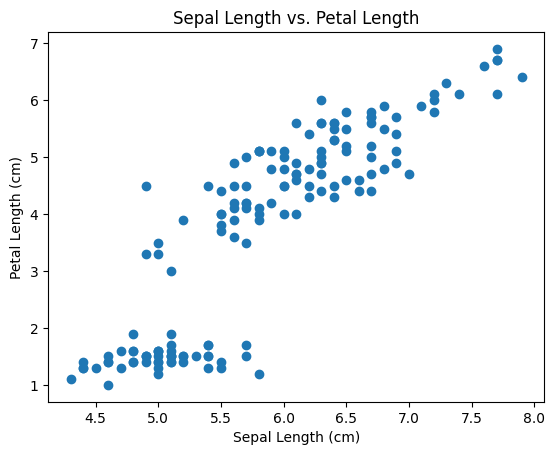

In [ ]:
plt.scatter(df['SepalLengthCm'], df['PetalLengthCm'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Sepal Length vs. Petal Length')
plt.show()

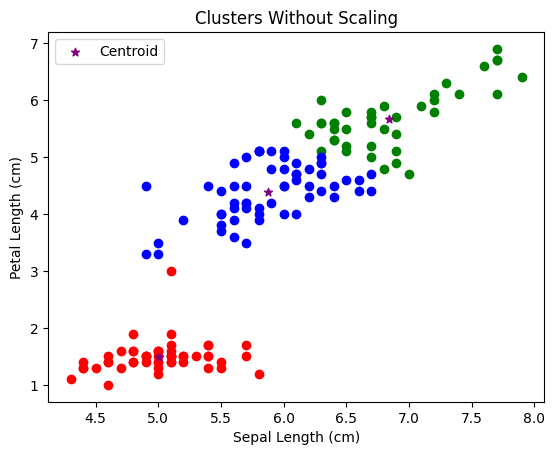

In [ ]:
# KMeans without scaling
km = KMeans(n_clusters=3, random_state=42)
y_predicted = km.fit_predict(df[['SepalLengthCm', 'PetalLengthCm']])
df['cluster'] = y_predicted

# Visualize clusters (unscaled)
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1['SepalLengthCm'], df1['PetalLengthCm'], color='green')
plt.scatter(df2['SepalLengthCm'], df2['PetalLengthCm'], color='red')
plt.scatter(df3['SepalLengthCm'], df3['PetalLengthCm'], color='blue')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            color='purple', marker='*', label='Centroid')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.title('Clusters Without Scaling')
plt.show()

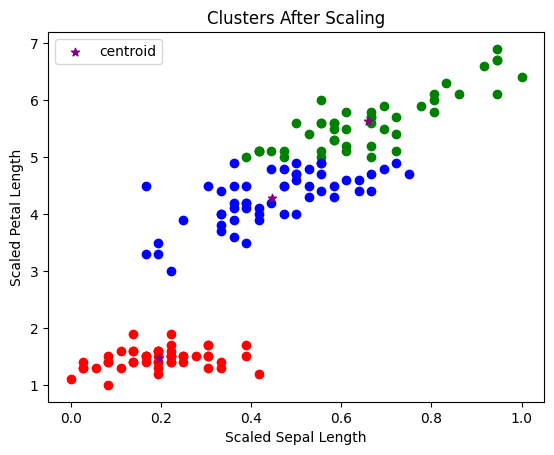

In [ ]:
# k means with scaling
scaler = MinMaxScaler()
df[['SepalLengthCm', 'petal length (cm)']] = scaler.fit_transform(df[['SepalLengthCm', 'PetalLengthCm']])


km = KMeans(n_clusters=3, random_state=42)
y_predicted = km.fit_predict(df[['SepalLengthCm', 'PetalLengthCm']])
df['cluster'] = y_predicted


df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1['SepalLengthCm'], df1['PetalLengthCm'], color='green')
plt.scatter(df2['SepalLengthCm'], df2['PetalLengthCm'], color='red')
plt.scatter(df3['SepalLengthCm'], df3['PetalLengthCm'], color='blue')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centroid')
plt.xlabel('Scaled Sepal Length')
plt.ylabel('Scaled Petal Length')
plt.legend()
plt.title('Clusters After Scaling')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 0 ( ) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 6 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


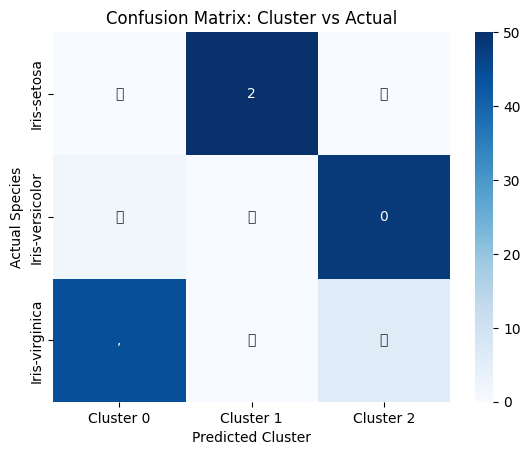

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


df_original = pd.read_csv('/content/Iris.csv')

le = LabelEncoder()
actual_labels = le.fit_transform(df_original['Species'])  # Now integers
predicted_labels = df['cluster']  # Already integers


conf_mat = confusion_matrix(actual_labels, predicted_labels)

sns.heatmap(conf_mat, annot=True, fmt='c', cmap='Blues',
            xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'],
            yticklabels=le.classes_)
plt.xlabel('Predicted Cluster')
plt.ylabel('Actual Species')
plt.title('Confusion Matrix: Cluster vs Actual')
plt.show()


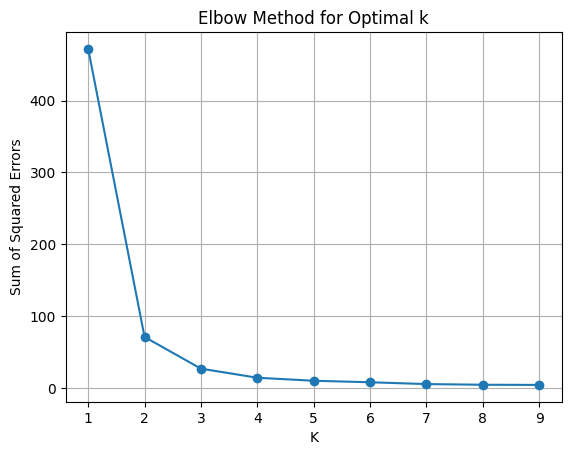

In [ ]:
# elbow plot
sse = []
k_rng = range(1, 10)
for k in k_rng:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df[['SepalLengthCm', 'PetalLengthCm']])
    sse.append(km.inertia_)

plt.plot(k_rng, sse, marker='o')
plt.xlabel('K')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

Based on the Elbow Method plot, the WCSS decreases significantly until k = 3, after which the decrease becomes more gradual. Therefore, k = 3 is the optimal number of clusters as it represents the "elbow point."

In [ ]:
print("Cluster centroids (after scaling):")
print(km.cluster_centers_)

Cluster centroids (after scaling):
[[0.51388889 4.5875    ]
 [0.19611111 1.464     ]
 [0.61979167 5.6       ]
 [0.95       6.66      ]
 [0.32986111 3.725     ]
 [0.19444444 3.2       ]
 [0.42261905 4.12142857]
 [0.78703704 6.02222222]
 [0.53703704 5.06190476]]
